In [2]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

import researchpy as rp

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
from numpy.polynomial.polynomial import polyfit
import seaborn as sns; sns.set(color_codes=True)

from IPython import display
from ipywidgets import interact, widgets

In [14]:
#df_cons = pd.merge(df_texture, df, on='ID')
#df_cons

In [5]:
cd C:\Users\Alfahham\Desktop\pythonproj\PCA

C:\Users\Alfahham\Desktop\pythonproj\PCA


In [8]:
pwdindex_col = 'True'
df = pd.read_csv('SHC_CONS_060519AA.csv', index_col ='ID')

In [10]:
np.mean(df.BD)

1.2679166666666664

In [11]:
#isolating by depth
df010 = df[df.Depth == 10.0]
df1020 = df[df.Depth == 20.0]
df2030 = df[df.Depth == 30.0]

STANDARD COLOR PALLETE FOR THE DATA VISUALIZATION BELOW:
    **TREATMENT** = Three main treatments include, organic manure, organic legume, conventional
    **TRTL** = six main treatments + tillage combinations include, organic manure till, organic manure nt, organic legume till, organic legume nt, conventional till, convetional nt.
    **TILLAGE** = 

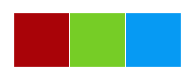

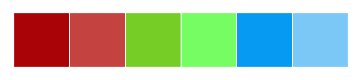

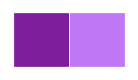

In [14]:
#SETTING MY OWN COLOR PALLETE HERE
#THIS WILL BE USED THROUGOUT THIS DOCUMENT
#**TREATMENT**
treatmentpallete = [sns.xkcd_rgb['darkish red'], sns.xkcd_rgb['apple green'],sns.xkcd_rgb['azure'] ]
sns.set_palette(treatmentpallete)
sns.palplot(sns.color_palette())

#**TRTL**
trtlpallete = [sns.xkcd_rgb['darkish red'], sns.xkcd_rgb['reddish'], sns.xkcd_rgb['apple green'], 
               sns.xkcd_rgb['lighter green'], sns.xkcd_rgb['azure'], sns.xkcd_rgb['lightblue']]
sns.set_palette(trtlpallete)
sns.palplot(sns.color_palette())

#**TILLAGE**
tillagepallete = [sns.xkcd_rgb['purple'], sns.xkcd_rgb['light purple']]
sns.set_palette(tillagepallete)
sns.palplot(sns.color_palette())

**SECTION 0.0.0**  :  PAIR PLOT OF THE GEOCHEM DATASET AT 0 - 10 CM

Text(0.5, 1.0, 'COARE_CLAY')

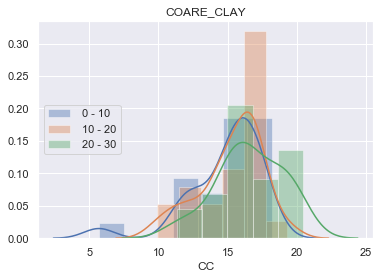

In [64]:
sns.distplot(df010.CC, label = ' 0 - 10')
sns.distplot(df1020.CC, label = ' 10 - 20')
sns.distplot(df2030.CC, label = ' 20 - 30')
plt.legend(loc='center left')
plt.title('COARE_CLAY')

Text(0.5, 1.0, 'COARE_CLAY')

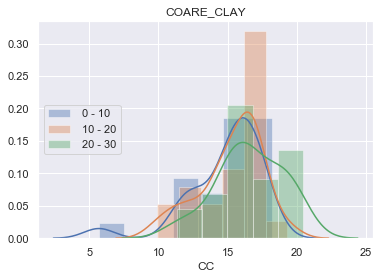

In [63]:
sns.distplot(df010.CC, label = ' 0 - 10')
sns.distplot(df1020.CC, label = ' 10 - 20')
sns.distplot(df2030.CC, label = ' 20 - 30')
plt.legend(loc='center left')
plt.title('COARE_CLAY')

Text(0.5, 1.0, 'SILT')

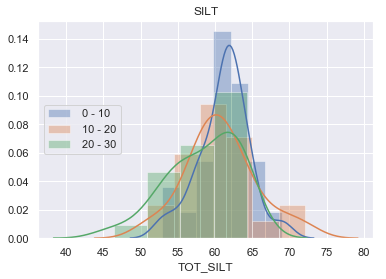

In [60]:
sns.distplot(df010.TOT_SILT, label = ' 0 - 10')
sns.distplot(df1020.TOT_SILT, label = ' 10 - 20')
sns.distplot(df2030.TOT_SILT, label = ' 20 - 30')
plt.legend(loc='center left')
plt.title('SILT')

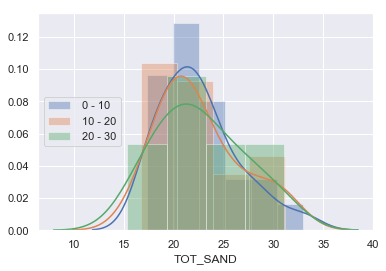

In [55]:
sns.distplot(df010.TOT_SAND, label = ' 0 - 10')
sns.distplot(df1020.TOT_SAND, label = ' 10 - 20')
sns.distplot(df2030.TOT_SAND, label = ' 20 - 30')
plt.legend(loc='center left')

In [67]:
nrmlplt = df_cons[['Treatment', 'Tillage', 'Sand', 'Silt', 'Clay']]
nrmlplt010 = df010[['Sand', 'Silt', 'Clay']]
nrmlplt1020 = df1020[['Sand', 'Silt', 'Clay']]
nrmlplt2030 = df2030[['Sand', 'Silt', 'Clay']]

KeyError: "['Treatment' 'Tillage'] not in index"

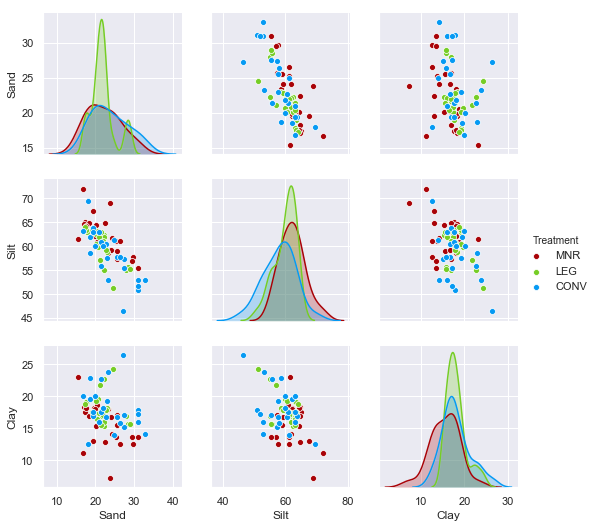

In [53]:
sns.pairplot(nrmlplt, hue="Treatment", palette = treatmentpallete)

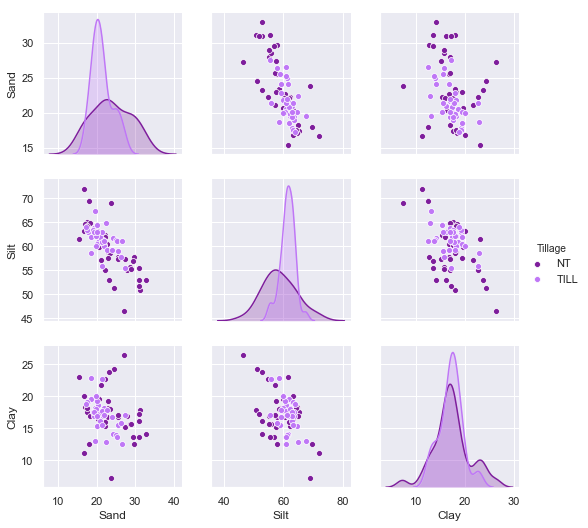

In [54]:
sns.pairplot(nrmlplt, hue="Tillage", palette = tillagepallete)

In [25]:
from matplotlib.patches import PathPatch
def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """
    ##iterating through Axes instances
    for ax in g.axes.flatten():

        ##iterating through axes artists:
        for c in ax.get_children():

            ##searching for PathPatches
            if isinstance(c, PathPatch):
                ##getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:,0])
                xmax = np.max(verts_sub[:,0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                ##setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:,0] == xmin,0] = xmin_new
                verts_sub[verts_sub[:,0] == xmax,0] = xmax_new

                ##setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin,xmax]):
                        l.set_xdata([xmin_new,xmax_new])

NameError: name 'df_cons' is not defined

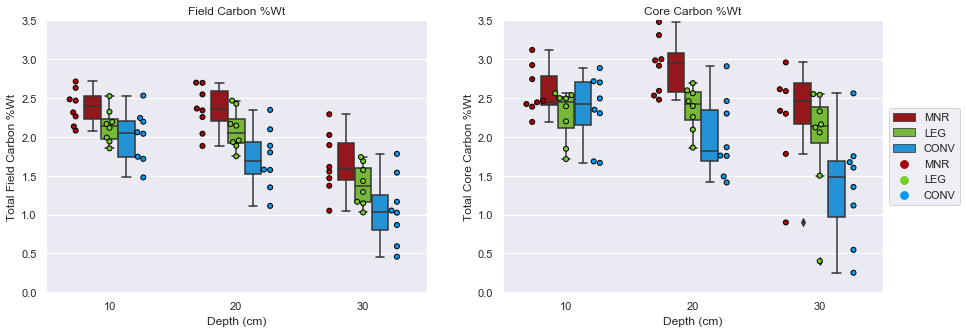

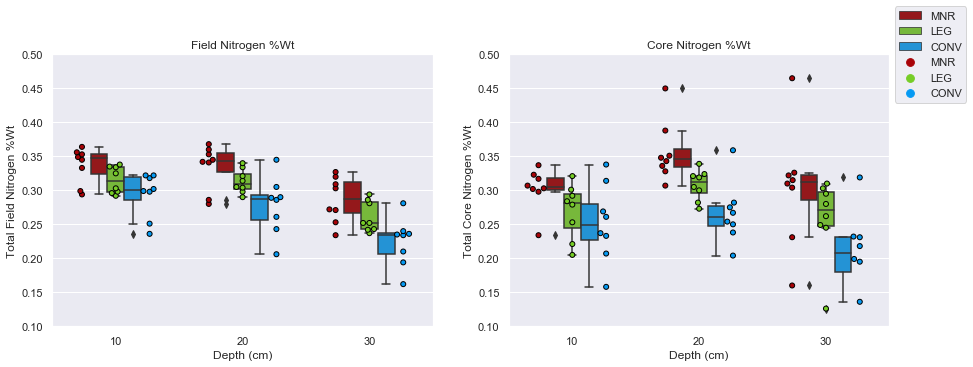

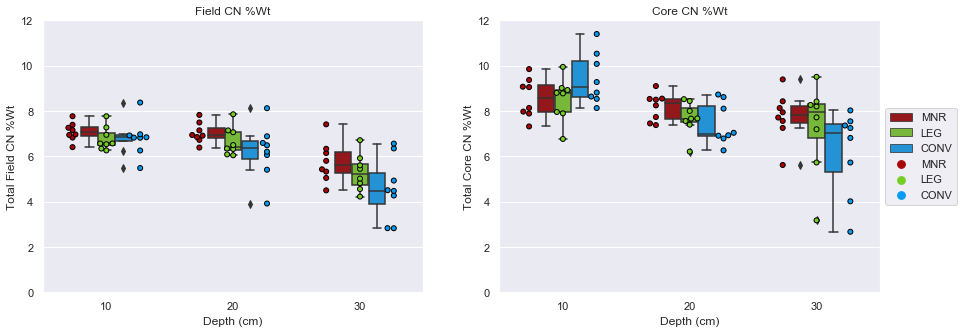

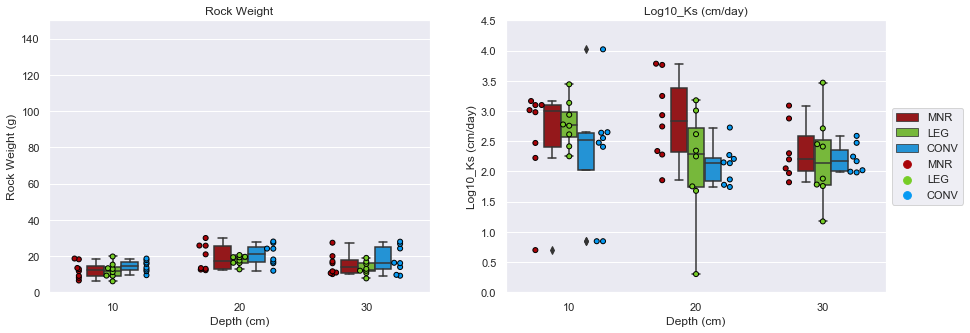

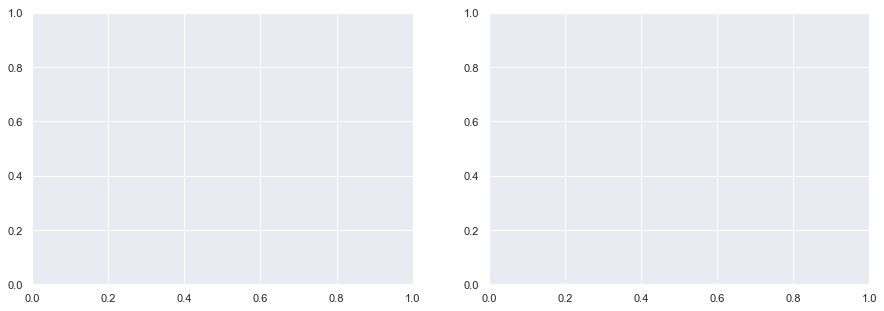

In [23]:
CarbonFigure, (CF1, CF2) = plt.subplots(1, 2, figsize=(15,5))

CF1 = sns.swarmplot(x=df.Depth, y=df.C_Field, hue = df.Treatment_str, edgecolor='black',dodge=True, linewidth = 1.0, ax = CF1, palette = treatmentpallete)
CF1 = sns.boxplot(x=df.Depth, y=df.C_Field, hue = df.Treatment_str, width = 0.4, ax = CF1, palette = treatmentpallete)
CF1.set_title('Field Carbon %Wt')
CF1.set_xlabel('Depth (cm)')
CF1.set_ylabel('Total Field Carbon %Wt')
CF1.set_ylim(0.0,3.5)
CF1.get_legend().remove()

CF2 = sns.swarmplot(x=df.Depth, y=df.C_Core, hue = df.Treatment_str, palette = treatmentpallete, edgecolor='black',dodge=True, linewidth = 1.0, ax = CF2)
CF2 = sns.boxplot(x=df.Depth, y=df.C_Core, hue = df.Treatment_str, palette = treatmentpallete, width = 0.4,  ax = CF2)
CF2.set_title('Core Carbon %Wt')
CF2.set_xlabel('Depth (cm)')
CF2.set_ylabel('Total Core Carbon %Wt')
CF2.set_ylim(0.0,3.5)
CF2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


NitrogenFigure, (NF1, NF2) = plt.subplots(1, 2, figsize=(15,5))
NF1 = sns.swarmplot(x=df.Depth, y=df.N_Field, hue = df.Treatment_str, edgecolor='black',dodge=True, linewidth = 1.0, ax = NF1, palette = treatmentpallete)
NF1 = sns.boxplot(x=df.Depth, y=df.N_Field, hue = df.Treatment_str, width = 0.4, ax = NF1, palette = treatmentpallete)
NF1.set_title('Field Nitrogen %Wt')
NF1.set_xlabel('Depth (cm)')
NF1.set_ylabel('Total Field Nitrogen %Wt')
NF1.set_ylim(0.1,0.5)
NF1.get_legend().remove()
NF2 = sns.swarmplot(x=df.Depth, y=df.N_Core, hue = df.Treatment_str, palette = treatmentpallete, edgecolor='black',dodge=True, linewidth = 1.0, ax = NF2)
NF2 = sns.boxplot(x=df.Depth, y=df.N_Core, hue = df.Treatment_str, palette = treatmentpallete, width = 0.4,  ax = NF2)
NF2.set_title('Core Nitrogen %Wt')
NF2.set_xlabel('Depth (cm)')
NF2.set_ylabel('Total Core Nitrogen %Wt')
NF2.set_ylim(0.1,0.5)
NF2.legend(loc='center left', bbox_to_anchor=(1, 1.0))

CNFigure, (CNF1, CNF2) = plt.subplots(1, 2, figsize=(15,5))
CNF1 = sns.swarmplot(x=df.Depth, y=df.CN_Field, hue = df.Treatment_str, edgecolor='black',dodge=True, linewidth = 1.0, ax = CNF1, palette = treatmentpallete)
CNF1 = sns.boxplot(x=df.Depth, y=df.CN_Field, hue = df.Treatment_str, width = 0.4, ax = CNF1, palette = treatmentpallete)
CNF1.set_title('Field CN %Wt')
CNF1.set_xlabel('Depth (cm)')
CNF1.set_ylabel('Total Field CN %Wt')
CNF1.set_ylim(0.0, 12.0)
CNF1.get_legend().remove()
CNF2 = sns.swarmplot(x=df.Depth, y=df.CN_Core, hue = df.Treatment_str, palette = treatmentpallete, edgecolor='black',dodge=True, linewidth = 1.0, ax = CNF2)
CNF2 = sns.boxplot(x=df.Depth, y=df.CN_Core, hue = df.Treatment_str, palette = treatmentpallete, width = 0.4,  ax = CNF2)
CNF2.set_title('Core CN %Wt')
CNF2.set_xlabel('Depth (cm)')
CNF2.set_ylabel('Total Core CN %Wt')
CNF2.set_ylim(0.0,12.0)
CNF2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ksatFigure, (KF1, KF2) = plt.subplots(1, 2, figsize=(15,5))
KF1 = sns.swarmplot(x=df.Depth, y=df.RockWt_pct, hue = df.Treatment_str, edgecolor='black',dodge=True, linewidth = 1.0, ax = KF1, palette = treatmentpallete)
KF1 = sns.boxplot(x=df.Depth, y=df.RockWt_pct, hue = df.Treatment_str, width = 0.4, ax = KF1, palette = treatmentpallete)
KF1.set_title('Rock Weight')
KF1.set_xlabel('Depth (cm)')
KF1.set_ylabel('Rock Weight (g)')
KF1.set_ylim(0.0, 150)
KF1.get_legend().remove()
KF2 = sns.swarmplot(x=df.Depth, y=df.Log_Ks_CH, hue = df.Treatment_str, palette = treatmentpallete, edgecolor='black',dodge=True, linewidth = 1.0, ax = KF2)
KF2 = sns.boxplot(x=df.Depth, y=df.Log_Ks_CH, hue = df.Treatment_str, palette = treatmentpallete, width = 0.4,  ax = KF2)
KF2.set_title('Log10_Ks (cm/day)')
KF2.set_xlabel('Depth (cm)')
KF2.set_ylabel('Log10_Ks (cm/day)')
KF2.set_ylim(0.0,4.5)
KF2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

AFigure, (AF1, AF2) = plt.subplots(1, 2, figsize=(15,5))
AF1 = sns.swarmplot(x=df.Depth, y=df_cons.Sand, hue = df_cons.Treatment_str, edgecolor='black',dodge=True, 
                    linewidth = 1.0, ax = AF1, palette = treatmentpallete)
AF1 = sns.boxplot(x=df.Depth, y=df_cons.Sand, hue = df_cons.Treatment_str, width = 0.4, ax = AF1, palette = treatmentpallete)
AF1.set_title('Sand Pct')
AF1.set_xlabel('Depth (cm)')
AF1.set_ylabel('Pct Sand (Wt%)')
AF1.set_ylim(15, 45)
AF1.get_legend().remove()
AF2 = sns.swarmplot(x=df.Depth, y=df.Log_Ks_CH, hue = df.Treatment_str, palette = treatmentpallete, edgecolor='black',dodge=True, linewidth = 1.0, ax = AF2)
AF2 = sns.boxplot(x=df.Depth, y=df.Log_Ks_CH, hue = df.Treatment_str, palette = treatmentpallete, width = 0.4,  ax = AF2)
KF2.set_title('Log10_Ks (cm/day)')
KF2.set_xlabel('Depth (cm)')
KF2.set_ylabel('Log10_Ks (cm/day)')
KF2.set_ylim(0.0,4.5)
KF2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

(0.0, 4.5)

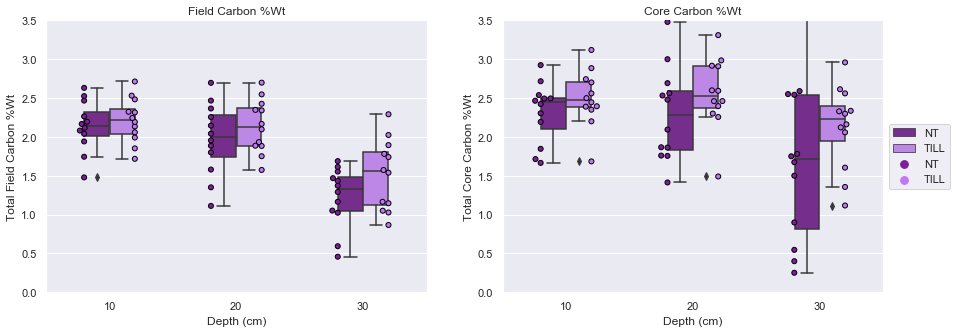

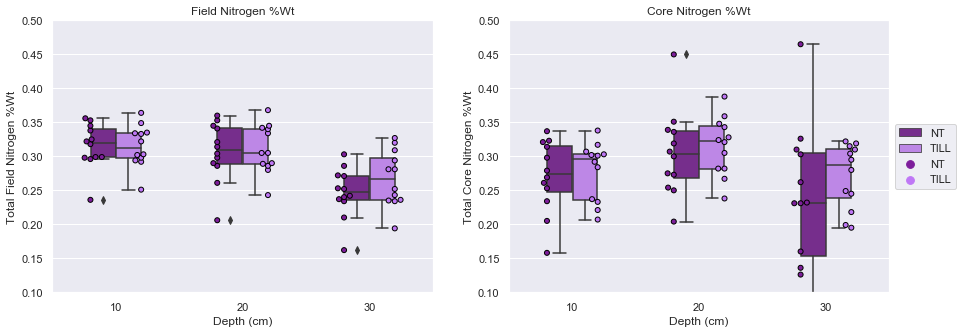

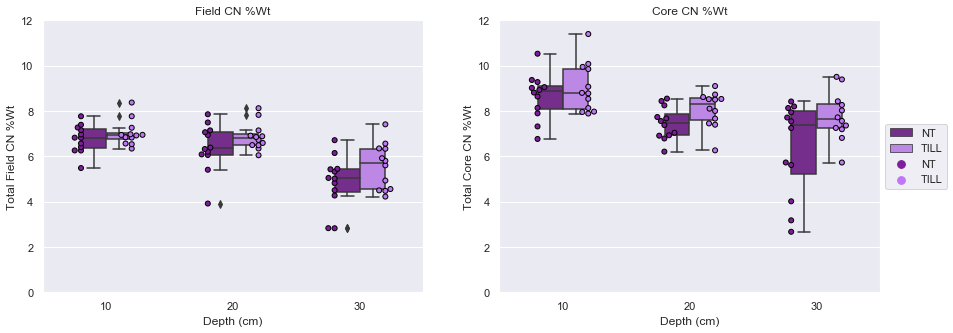

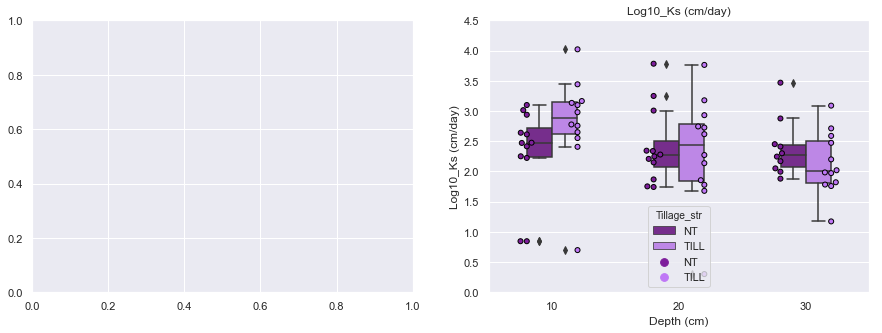

In [21]:
CarbonFigure, (CF1, CF2) = plt.subplots(1, 2, figsize=(15,5))

CF1 = sns.swarmplot(x=df.Depth, y=df.C_Field, hue = df.Tillage_str, edgecolor='black',dodge=True, linewidth = 1.0, ax = CF1, 
                    palette = tillagepallete)
CF1 = sns.boxplot(x=df.Depth, y=df.C_Field, hue = df.Tillage_str, width = 0.4, ax = CF1, palette = tillagepallete)
CF1.set_title('Field Carbon %Wt')
CF1.set_xlabel('Depth (cm)')
CF1.set_ylabel('Total Field Carbon %Wt')
CF1.set_ylim(0.0,3.5)
CF1.get_legend().remove()
CF2 = sns.swarmplot(x=df.Depth, y=df.C_Core, hue = df.Tillage_str, palette = tillagepallete, edgecolor='black',dodge=True, linewidth = 1.0, ax = CF2)
CF2 = sns.boxplot(x=df.Depth, y=df.C_Core, hue = df.Tillage_str, palette = tillagepallete, width = 0.4,  ax = CF2)
CF2.set_title('Core Carbon %Wt')
CF2.set_xlabel('Depth (cm)')
CF2.set_ylabel('Total Core Carbon %Wt')
CF2.set_ylim(0.0,3.5)
CF2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


NitrogenFigure, (NF1, NF2) = plt.subplots(1, 2, figsize=(15,5))
NF1 = sns.swarmplot(x=df.Depth, y=df.N_Field, hue = df.Tillage_str, edgecolor='black',dodge=True, linewidth = 1.0, ax = NF1, 
                    palette = tillagepallete)
NF1 = sns.boxplot(x=df.Depth, y=df.N_Field, hue = df.Tillage_str, width = 0.4, ax = NF1, palette = tillagepallete)
NF1.set_title('Field Nitrogen %Wt')
NF1.set_xlabel('Depth (cm)')
NF1.set_ylabel('Total Field Nitrogen %Wt')
NF1.set_ylim(0.1,0.5)
NF1.get_legend().remove()
NF2 = sns.swarmplot(x=df.Depth, y=df.N_Core, hue = df.Tillage_str, palette = tillagepallete, edgecolor='black',dodge=True, 
                    linewidth = 1.0, ax = NF2)
NF2 = sns.boxplot(x=df.Depth, y=df.N_Core, hue = df.Tillage_str, palette = tillagepallete, width = 0.4,  ax = NF2)
NF2.set_title('Core Nitrogen %Wt')
NF2.set_xlabel('Depth (cm)')
NF2.set_ylabel('Total Core Nitrogen %Wt')
NF2.set_ylim(0.1,0.5)
NF2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

CNFigure, (CNF1, CNF2) = plt.subplots(1, 2, figsize=(15,5))
CNF1 = sns.swarmplot(x=df.Depth, y=df.CN_Field, hue = df.Tillage_str, edgecolor='black',dodge=True, linewidth = 1.0, ax = CNF1, 
                     palette = tillagepallete)
CNF1 = sns.boxplot(x=df.Depth, y=df.CN_Field, hue = df.Tillage_str, width = 0.4, ax = CNF1, palette = tillagepallete)
CNF1.set_title('Field CN %Wt')
CNF1.set_xlabel('Depth (cm)')
CNF1.set_ylabel('Total Field CN %Wt')
CNF1.set_ylim(0.0, 12.0)
CNF1.get_legend().remove()
CNF2 = sns.swarmplot(x=df.Depth, y=df.CN_Core, hue = df.Tillage_str, palette = tillagepallete, edgecolor='black',dodge=True, linewidth = 1.0, ax = CNF2)
CNF2 = sns.boxplot(x=df.Depth, y=df.CN_Core, hue = df.Tillage_str, palette = tillagepallete, width = 0.4,  ax = CNF2)
CNF2.set_title('Core CN %Wt')
CNF2.set_xlabel('Depth (cm)')
CNF2.set_ylabel('Total Core CN %Wt')
CNF2.set_ylim(0.0,12.0)
CNF2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ksatFigure, (KF1, KF2) = plt.subplots(1, 2, figsize=(15,5))
#KF1 = sns.swarmplot(x=df.Depth, y=df.Sand, hue = df.Tillage_str, edgecolor='black',dodge=True, linewidth = 1.0, ax = KF1, 
                    #palette = tillagepallete)
#KF1 = sns.boxplot(x=df.Depth, y=df.Sand, hue = df.Tillage_str, width = 0.4, ax = KF1, palette = tillagepallete)
#KF1.set_title('Rock Weight')
#KF1.set_xlabel('Depth (cm)')
#KF1.set_ylabel('Rock Weight (g)')
#KF1.set_ylim(0.0, 150)
#KF1.get_legend().remove()

KF2 = sns.swarmplot(x=df.Depth, y=df.Log_Ks_CH, hue = df.Tillage_str, palette = tillagepallete, edgecolor='black',dodge=True, linewidth = 1.0, ax = KF2)
KF2 = sns.boxplot(x=df.Depth, y=df.Log_Ks_CH, hue = df.Tillage_str, palette = tillagepallete, width = 0.4,  ax = KF2)
KF2.set_title('Log10_Ks (cm/day)')
KF2.set_xlabel('Depth (cm)')
KF2.set_ylabel('Log10_Ks (cm/day)')
KF2.set_ylim(0.0,4.5)

In [12]:
print (stats.gmean(df.C_Field) , np.mean(df.C_Field))

1.7748037718323866 1.8661944444444447


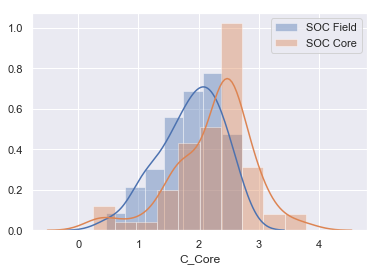

In [349]:
#plotting the dist of the data and adding in a qqplot
sns.distplot(df.C_Field, label = "SOC Field")
sns.distplot(df.C_Core, label = "SOC Core")
plt.legend()

(0.8794423804866236, 2.9154890594119557e-24)


Text(0.5, 1.0, 'Carbon vs Nitrogen')

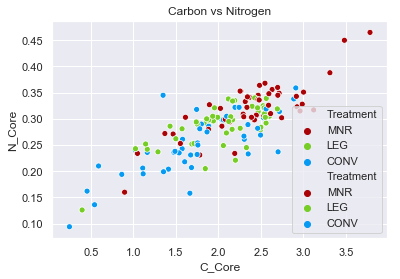

In [187]:
print(stats.pearsonr(df.C_Field, df.N_Field))
sns.scatterplot(x=df.C_Field, y=df.N_Field, hue = df.Treatment, palette = treatmentpallete)
sns.scatterplot(x=df.C_Core, y=df.N_Core, hue = df.Treatment, palette = treatmentpallete)
plt.title('Carbon vs Nitrogen')

((array([-2.34237006, -1.99082273, -1.78576047, -1.63630524, -1.51641919,
         -1.41505947, -1.32645591, -1.24719392, -1.1750766 , -1.1086024 ,
         -1.04669686, -0.98856283, -0.93359131, -0.88130563, -0.83132494,
         -0.78333952, -0.7370936 , -0.69237302, -0.64899629, -0.60680784,
         -0.56567297, -0.52547391, -0.48610679, -0.44747917, -0.40950814,
         -0.37211871, -0.33524254, -0.29881684, -0.26278347, -0.22708822,
         -0.19168008, -0.1565107 , -0.12153391, -0.08670522, -0.05198142,
         -0.01732021,  0.01732021,  0.05198142,  0.08670522,  0.12153391,
          0.1565107 ,  0.19168008,  0.22708822,  0.26278347,  0.29881684,
          0.33524254,  0.37211871,  0.40950814,  0.44747917,  0.48610679,
          0.52547391,  0.56567297,  0.60680784,  0.64899629,  0.69237302,
          0.7370936 ,  0.78333952,  0.83132494,  0.88130563,  0.93359131,
          0.98856283,  1.04669686,  1.1086024 ,  1.1750766 ,  1.24719392,
          1.32645591,  1.41505947,  1.

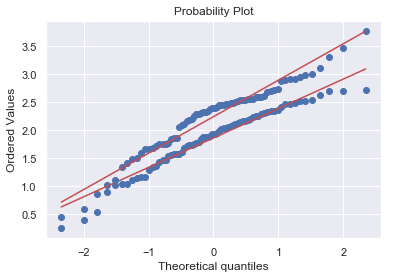

In [350]:
stats.probplot(df.C_Field, plot=sns.mpl.pyplot)
stats.probplot(df.C_Core, plot=sns.mpl.pyplot)

In [71]:
# mean of each treatment
rp.summary_cont(df.groupby(['Treatment_str','Tillage_str']))['C_Field']

N      Mean        SD        SE  95% Conf.  \
Treatment_str Tillage_str                                                
CONV          NT           12  1.369333  0.542563  0.156624   1.062350   
              TILL         12  1.817917  0.485634  0.140190   1.543144   
LEG           NT           12  1.898917  0.434060  0.125302   1.653324   
              TILL         12  1.844250  0.434199  0.125342   1.598579   
MNR           NT           12  2.068083  0.462316  0.133459   1.806504   
              TILL         12  2.198667  0.457985  0.132209   1.939537   

                           Interval  
Treatment_str Tillage_str            
CONV          NT           1.676317  
              TILL         2.092690  
LEG           NT           2.144509  
              TILL         2.089921  
MNR           NT           2.329663  
              TILL         2.457796

In [55]:
rp.summary_cont(df.groupby(['Tillage']))['BD']

,N,Mean,SD,SE,95% Conf.,Interval
Tillage,,,,,,
NT,36,1.326111,0.177076,0.029513,1.268266,1.383956
TILL,36,1.209722,0.154836,0.025806,1.159142,1.260302


In [38]:
dfRock= rp.summary_cont(df.groupby(['Depth']))['BD']
dfRock

KeyError: 'BD'

In [15]:
# TRYING TO GET MEAN OF ALL THE VARIABLES 
# DEFINING ALL COLS THAT CARE ABOUT 
# GETTING SUM STATS
cols = ['BD', 'n',
       'Compaction', 'RockWt', 'C_Field', 'N_Field', 'CN_Field', 'C_Core',
       'N_Core', 'CN_Core', 'Log_Ks_CH', 'TOT_SAND', 'CSILT', 'MSILT',
       'TOT_SILT', 'FSILT', 'CCLAY', 'FCLAY', 'TOT_CLAY', 'Ks_CH', 'Seki_ths',
       'Seki_thr', 'Seki_hm', 'Seki_sigma', 'Seki_hm2', 'Seki_sigma2',
       'Seki_W', 'vg_ths', 'vg_thr', 'vg_alfa1', 'vg_n', 'vg_w2', 'vg_alfa2',
       'vg_n2', 'vgm_vwr_wp', 'seki_vwr_wp', 'vgm_vwr_fc', 'seki_vwr_fc',
       'paw_vgm', 'paw_seki', 'vgm_mt_ths', 'vgm_mt_thr', 'vgm_mt_loga1',
       'vgm_mt_logn1']

dfTreatment = rp.summary_cont(df.groupby(['Treatment', 'Depth']))[cols]
dfTillage = rp.summary_cont(df.groupby(['Tillage', 'Depth']))[cols]
dfTillage

BD                                                     n  \
                N      Mean        SD        SE 95% Conf.  Interval   N   
Tillage Depth                                                             
NT      10     12  1.258333  0.140572  0.040580  1.178797  1.337870  12   
        20     12  1.258333  0.124158  0.035841  1.188084  1.328582  12   
        30     12  1.461667  0.185807  0.053638  1.356536  1.566797  12   
TILL    10     12  1.122500  0.133493  0.038536  1.046969  1.198031  12   
        20     12  1.160833  0.131111  0.037849  1.086650  1.235016  12   
        30     12  1.345833  0.100766  0.029089  1.288820  1.402847  12   

                                               ...    vgm_mt_loga1            \
                   Mean        SD        SE    ...              SD        SE   
Tillage Depth                                  ...                             
NT      10     0.525833  0.053165  0.015347    ...        0.825236  0.238225   
        20     0.525000  0.046807  0.013512    ...        0.409955  0.118344   
        30     0.449167  0.070641  0.020392    ...        1.242061  0.358552   
TILL    10     0.575833  0.050715  0.014640    ...        1.164324  0.336111   
        20     0.563333  0.049604  0.014320    ...        0.764731  0.220759   
        30     0.493333  0.037009  0.010684    ...        1.027287  0.296552   

                                  vgm_mt_logn1                                \
              95% Conf.  Interval            N      Mean        SD        SE   
Tillage Depth                                                                  
NT      10    -2.770004 -1.836162           12  0.113583  0.008129  0.002347   
        20    -2.992787 -2.528880           12  0.113417  0.011501  0.003320   
        30    -2.410512 -1.004988           12  0.108250  0.035591  0.010274   
TILL    10    -2.234028 -0.916472           12  0.135833  0.049286  0.014227   
        20    -2.972604 -2.107230           12  0.117583  0.012781  0.003690   
        30    -2.770159 -1.607674           12  0.109833  0.044002  0.012702   

                                   
              95% Conf.  Interval  
Tillage Depth                      
NT      10     0.108984  0.118183  
        20     0.106910  0.119924  
        30     0.088112  0.128388  
TILL    10     0.107947  0.163719  
        20     0.110352  0.124815  
        30     0.084937  0.134730  

[6 rows x 264 columns]

In [57]:
# TRYING TO GET MEAN OF ALL THE VARIABLES 
# DEFINING ALL COLS THAT CARE ABOUT 
# GETTING SUM STATS
#THIS IS ONLY FOR TREATMENTS
cols = ['BD', 'n',
       'Compaction', 'RockWt', 'C_Field', 'N_Field', 'CN_Field', 'C_Core',
       'N_Core', 'CN_Core', 'Log_Ks_CH', 'TOT_SAND', 'CSILT', 'MSILT',
       'TOT_SILT', 'FSILT', 'CCLAY', 'FCLAY', 'TOT_CLAY', 'Ks_CH', 'Seki_ths',
       'Seki_thr', 'Seki_hm', 'Seki_sigma', 'Seki_hm2', 'Seki_sigma2',
       'Seki_W', 'vg_ths', 'vg_thr', 'vg_alfa1', 'vg_n', 'vg_w2', 'vg_alfa2',
       'vg_n2', 'vgm_vwr_wp', 'seki_vwr_wp', 'vgm_vwr_fc', 'seki_vwr_fc',
       'paw_vgm', 'paw_seki', 'vgm_mt_ths', 'vgm_mt_thr', 'vgm_mt_loga1',
       'vgm_mt_logn1']
cols_to_plot = ['Seki_ths','vg_ths', 'vgm_vwr_wp', 'seki_vwr_wp', 'vgm_vwr_fc', 'seki_vwr_fc',
       'paw_vgm', 'paw_seki', 'vgm_mt_ths']
columns=["LEG_10", "LEG_20", "LEG_30", "MNR_10", "MNR_20", "MNR_30"]
data = []
for col in cols:
    dfx_mean = dfTreatment[col].Mean
    LEGPCTDIFF10 = ((dfx_mean[3] - dfx_mean[0]) / dfx_mean[0]) * 100
    LEGPCTDIFF20 = ((dfx_mean[4] - dfx_mean[1]) / dfx_mean[1]) * 100
    LEGPCTDIFF30 = ((dfx_mean[5] - dfx_mean[2]) / dfx_mean[2]) * 100

    MNRPCTDIFF10 = ((dfx_mean[6] - dfx_mean[0]) / dfx_mean[0]) * 100
    MNRPCTDIFF20 = ((dfx_mean[7] - dfx_mean[1]) / dfx_mean[1]) * 100
    MNRPCTDIFF30 = ((dfx_mean[8] - dfx_mean[2]) / dfx_mean[2]) * 100
    data.append([LEGPCTDIFF10, LEGPCTDIFF20, LEGPCTDIFF30, MNRPCTDIFF10, MNRPCTDIFF20, MNRPCTDIFF30])
dfxx = pd.DataFrame(data, index=cols, columns=columns)

#NOW I WANT TO FILTER OUT THE VARIABLES THAT I DONT CARE ABOUT IN ORDER TO PLOT THE DELTAS I HAVE 
dfxx_plot = dfxx.loc[cols_to_plot]
dfxx_plot

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


,LEG_10,LEG_20,LEG_30,MNR_10,MNR_20,MNR_30
Seki_ths,-1.793722,-10.950081,1.754386,0.448430,-5.958132,3.258145
vg_ths,-2.314707,4.060351,12.650602,1.239186,10.095407,16.867470
vgm_vwr_wp,1.681682,-1.823032,33.427963,0.900901,-4.757670,24.698368
seki_vwr_wp,39.430285,19.866071,-12.815716,27.586207,-7.254464,-19.457437
vgm_vwr_fc,0.554734,1.145147,25.456204,1.738166,-0.286287,21.167883
seki_vwr_fc,3.373768,4.931193,14.593624,5.761941,1.347477,12.303547
paw_vgm,-1.153846,6.104418,11.494253,2.884615,7.550201,14.814815
paw_seki,-8.975659,-0.231571,39.810017,-1.724138,4.438441,41.709845
vgm_mt_ths,8.642544,3.899220,3.973333,6.890989,6.398720,14.400000


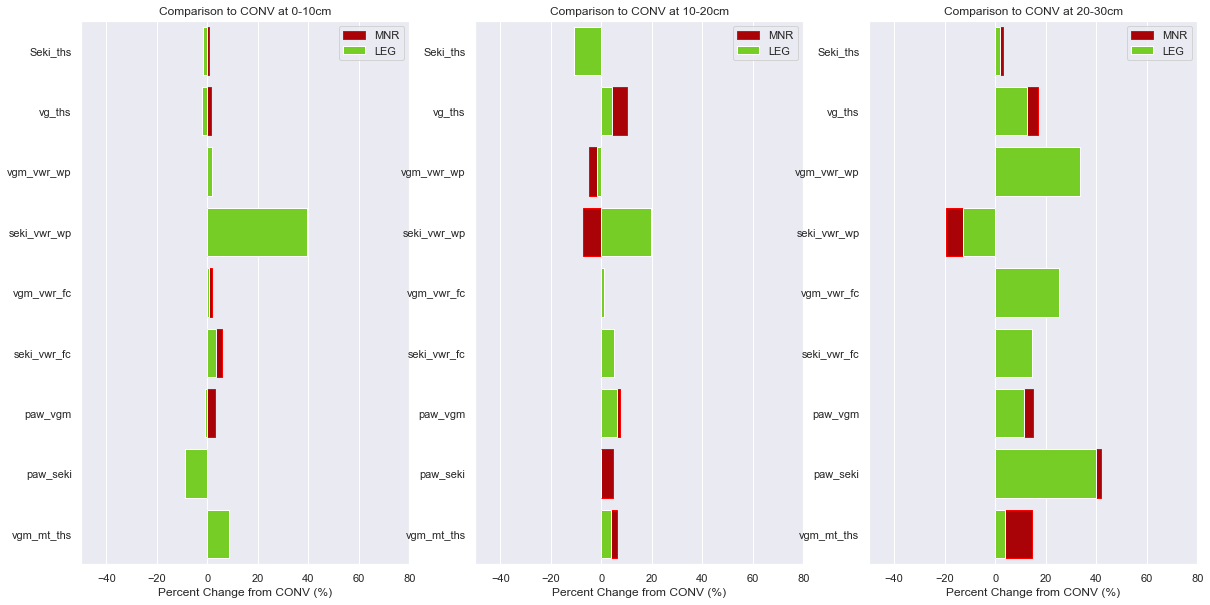

In [58]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1 = sns.barplot(y = dfxx_plot.index, x = dfxx_plot.MNR_10, facecolor = sns.xkcd_rgb['darkish red'], edgecolor = 'Red', label ='MNR', ax=ax1)
ax1 = sns.barplot(y = dfxx_plot.index, x = dfxx_plot.LEG_10, facecolor = sns.xkcd_rgb['apple green'], label = 'LEG', ax=ax1)
ax1.set_xlim(-50,80)
ax1.set_title('Comparison to CONV at 0-10cm')
ax1.set_xlabel('Percent Change from CONV (%)')
ax1.legend()

ax2 = sns.barplot(y = dfxx_plot.index, x = dfxx_plot.MNR_20, facecolor = sns.xkcd_rgb['darkish red'], edgecolor = 'Red', label ='MNR', ax=ax2)
ax2 = sns.barplot(y = dfxx_plot.index, x = dfxx_plot.LEG_20, facecolor = sns.xkcd_rgb['apple green'], label = 'LEG', ax=ax2)
ax2.set_xlim(-50,80)
ax2.set_title('Comparison to CONV at 10-20cm')
ax2.set_xlabel('Percent Change from CONV (%)')
ax2.legend()


ax3 = sns.barplot(y = dfxx_plot.index, x = dfxx_plot.MNR_30, facecolor = sns.xkcd_rgb['darkish red'], edgecolor = 'Red', label ='MNR', ax=ax3)
ax3 = sns.barplot(y = dfxx_plot.index, x = dfxx_plot.LEG_30, facecolor = sns.xkcd_rgb['apple green'], label = 'LEG', ax=ax3)
ax3.set_xlim(-50,80)
ax3.set_title('Comparison to CONV at 20-30cm')
ax3.set_xlabel('Percent Change from CONV (%)')
ax3.legend()
figure.savefig("comparisonx.png")

In [ ]:
sns.barplot( x = dfxx.index, y = dfxx.LEGPCTDIFF30, color = 'blue')
sns.barplot( x = dfxx.index, y = dfxx.MNRPCTDIFF30, color = 'red')
plt.xticks(rotation = 90)


In [34]:
dfx_median = np.median(df010.groupby(['Treatment'])['BD'])
dfx_median

ValueError: setting an array element with a sequence

In [247]:
dfTillage.Log_Ks_CH

N      Mean        SD        SE  95% Conf.  Interval
Tillage Depth                                                       
NT      10.0   12  2.319833  0.743820  0.214722   1.898978  2.740689
        20.0   12  2.414583  0.623910  0.180107   2.061573  2.767593
        30.0   10  2.385600  0.473051  0.149592   2.092400  2.678800
TILL    10.0   12  2.807500  0.793858  0.229167   2.358333  3.256667
        20.0   12  2.332167  0.887309  0.256144   1.830124  2.834209
        30.0   12  2.131583  0.515472  0.148804   1.839928  2.423239

In [19]:
# TRYING TO GET MEAN OF ALL THE VARIABLES 
# DEFINING ALL COLS THAT CARE ABOUT 
# GETTING SUM STATS
#THIS IS ONLY FOR TILLAGE
cols = ['BD', 'n',
       'Compaction', 'RockWt', 'C_Field', 'N_Field', 'CN_Field', 'C_Core',
       'N_Core', 'CN_Core', 'Log_Ks_CH', 'TOT_SAND', 'CSILT', 'MSILT',
       'TOT_SILT', 'FSILT', 'CCLAY', 'FCLAY', 'TOT_CLAY', 'Ks_CH', 'Seki_ths',
       'Seki_thr', 'Seki_hm', 'Seki_sigma', 'Seki_hm2', 'Seki_sigma2',
       'Seki_W', 'vg_ths', 'vg_thr', 'vg_alfa1', 'vg_n', 'vg_w2', 'vg_alfa2',
       'vg_n2', 'vgm_vwr_wp', 'seki_vwr_wp', 'vgm_vwr_fc', 'seki_vwr_fc',
       'paw_vgm', 'paw_seki', 'vgm_mt_ths', 'vgm_mt_thr', 'vgm_mt_loga1',
       'vgm_mt_logn1']
columns=["TILLPCTDIFF10", "TILLPCTDIFF20", "TILLPCTDIFF30"]
data = []
for col in cols:
    dfx_mean_till = dfTillage[col].Mean
    TILLPCTDIFF10 = ((dfx_mean_till[3] - dfx_mean_till[0]) / dfx_mean_till[0]) * 100
    TILLPCTDIFF20 = ((dfx_mean_till[4] - dfx_mean_till[1]) / dfx_mean_till[1]) * 100
    TILLPCTDIFF30 = ((dfx_mean_till[5] - dfx_mean_till[2]) / dfx_mean_till[2]) * 100
    
    data.append([TILLPCTDIFF10, TILLPCTDIFF20, TILLPCTDIFF30])
df_till = pd.DataFrame(data, index=cols, columns=columns)
df_till

,TILLPCTDIFF10,TILLPCTDIFF20,TILLPCTDIFF30
BD,-10.794702,-7.748344,-7.924743
n,9.508716,7.301587,9.833024
Compaction,16.598778,16.598778,16.598778
RockWt,-24.378233,-24.245460,-20.859482
C_Field,3.522856,8.456954,23.032486
N_Field,-0.211361,1.304702,8.237677
CN_Field,3.851270,7.233146,14.192244
C_Core,7.891896,11.564750,25.897790
N_Core,2.767528,3.471843,13.038943
CN_Core,4.495346,8.306045,22.052262


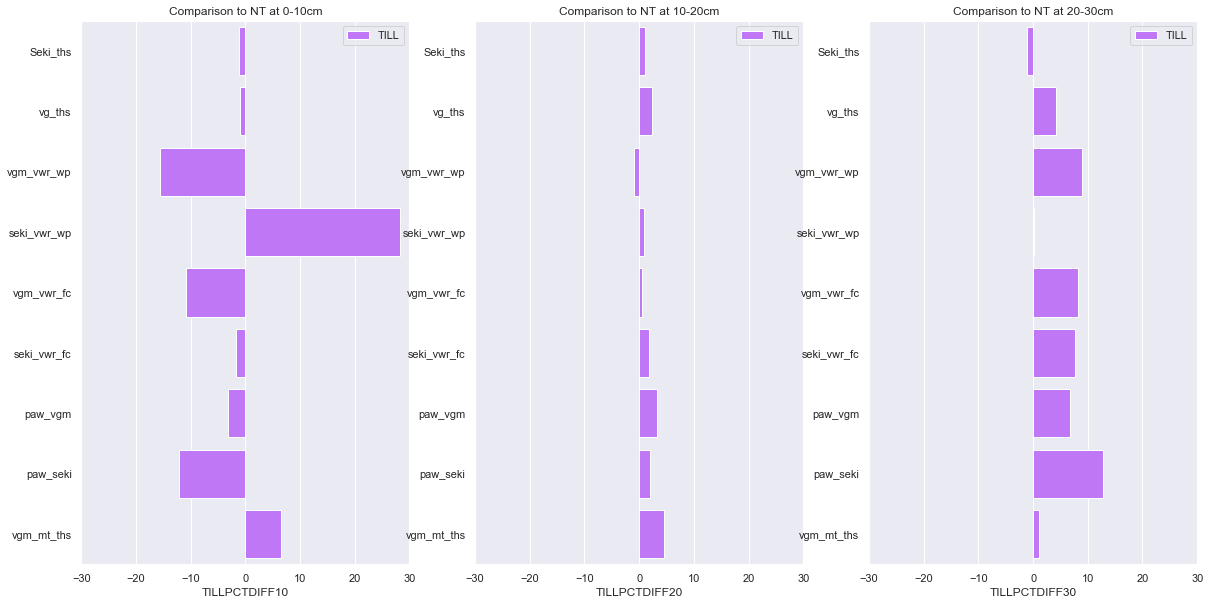

In [59]:
cols_to_plot = ['Seki_ths','vg_ths', 'vgm_vwr_wp', 'seki_vwr_wp', 'vgm_vwr_fc', 'seki_vwr_fc',
       'paw_vgm', 'paw_seki', 'vgm_mt_ths']
columns=["LEG_10", "LEG_20", "LEG_30", "MNR_10", "MNR_20", "MNR_30"]
dfTl_plot = df_till.loc[cols_to_plot]


figure, (bx1, bx2, bx3) = plt.subplots(1, 3, figsize=(20,10))

bx1 = sns.barplot(y = dfTl_plot.index, x = dfTl_plot.TILLPCTDIFF10, facecolor = sns.xkcd_rgb['light purple'], edgecolor = 'White', label ='TILL', ax=bx1)
bx1.set_title('Comparison to NT at 0-10cm')
bx1.legend()
bx1.set_xlim(-30,30)


bx2 = sns.barplot(y = dfTl_plot.index, x = dfTl_plot.TILLPCTDIFF20, facecolor = sns.xkcd_rgb['light purple'], edgecolor = 'White', label ='TILL', ax=bx2)
bx2.set_title('Comparison to NT at 10-20cm')
bx2.legend()
bx2.set_xlim(-30,30)



bx3 = sns.barplot(y = dfTl_plot.index, x = dfTl_plot.TILLPCTDIFF30, facecolor = sns.xkcd_rgb['light purple'], edgecolor = 'White', label ='TILL', ax=bx3)
bx3.set_title('Comparison to NT at 20-30cm')
bx3.legend()
bx3.set_xlim(-30,30)
figure.savefig("comparison2.png")

In [7]:
columns=["LEGPCTDIFF10", "LEGPCTDIFF20", "LEGPCTDIFF30", "MNRPCTDIFF10", "MNRPCTDIFF20", "MNRPCTDIFF30"]

In [17]:
cols = ['BD']
columns=["LEGPCTDIFF10", "LEGPCTDIFF20", "LEGPCTDIFF30", "MNRPCTDIFF10", "MNRPCTDIFF20", "MNRPCTDIFF30"]
data = []

for col in cols:
    dfx_mean = dfx['BD'].Mean
    LEGPCTDIFF10 = ((dfx_mean[3] - dfx_mean[0]) / dfx_mean[0]) * 100
    LEGPCTDIFF20 = ((dfx_mean[4] - dfx_mean[1]) / dfx_mean[1]) * 100
    LEGPCTDIFF30 = ((dfx_mean[5] - dfx_mean[2]) / dfx_mean[2]) * 100

    MNRPCTDIFF10 = ((dfx_mean[6] - dfx_mean[0]) / dfx_mean[0]) * 100
    MNRPCTDIFF20 = ((dfx_mean[7] - dfx_mean[1]) / dfx_mean[1]) * 100
    MNRPCTDIFF30 = ((dfx_mean[8] - dfx_mean[2]) / dfx_mean[2]) * 100
    data.append([LEGPCTDIFF10, LEGPCTDIFF20, LEGPCTDIFF30, MNRPCTDIFF10, MNRPCTDIFF20, MNRPCTDIFF30])
dfxxx = pd.DataFrame(data, index=cols, columns=columns)
dfxxx

,LEGPCTDIFF10,LEGPCTDIFF20,LEGPCTDIFF30,MNRPCTDIFF10,MNRPCTDIFF20,MNRPCTDIFF30
BD,-0.721649,-7.333333,-6.093489,-4.742268,-16.190476,-12.687813


In [35]:
dfx.Compaction.Mean

Treatment  Depth
CONV       10.0     17.714286
           20.0     17.714286
           30.0     17.714286
LEG        10.0     32.500000
           20.0     32.500000
           30.0     32.500000
MNR        10.0     29.687500
           20.0     29.687500
           30.0     29.687500
Name: Mean, dtype: float64

In [15]:
dfx_mean

Treatment  Depth
CONV       10.0     0.121875
           20.0     0.109375
           30.0     0.127250
LEG        10.0     0.119375
           20.0     0.116625
           30.0     0.095750
MNR        10.0     0.132875
           20.0     0.120500
           30.0     0.104125
Name: Mean, dtype: float64

In [38]:
#THE VALUES WILL ALWAYS BE COMPARED TO THE CONV SYSTEM 

In [387]:
C_model = ols('C_Field ~ C(Treatment)*C(Tillage)', df).fit()
print(f"Overall model F({C_model.df_model: .0f},{C_model.df_resid: .0f}) = {C_model.fvalue: .3f}, p = {C_model.f_pvalue: .4f}")
N_model = ols('N_Field ~ C(Treatment)*C(Tillage)', df).fit()
print(f"Overall model F({N_model.df_model: .0f},{N_model.df_resid: .0f}) = {N_model.fvalue: .3f}, p = {N_model.f_pvalue: .4f}")
CN_model = ols('CN_Field ~ C(Treatment)*C(Tillage)', df).fit()
print(f"Overall model F({CN_model.df_model: .0f},{N_model.df_resid: .0f}) = {N_model.fvalue: .3f}, p = {N_model.f_pvalue: .4f}")

Overall model F( 5, 66) =  4.351, p =  0.0018
Overall model F( 5, 66) =  4.528, p =  0.0013
Overall model F( 5, 66) =  4.528, p =  0.0013


In [388]:
C_model.summary()
N_model.summary()
CN_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CN_Field   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     3.992
Date:                Fri, 03 May 2019   Prob (F-statistic):            0.00318
Time:                        20:44:13   Log-Likelihood:                -102.19
No. Observations:                  72   AIC:                             216.4
Df Residuals:                      66   BIC:                             230.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  5.1177      0.302     16.967      0.000       4.515       5.720
C(Treatment)[T.LEG]                        1.3166      0.427      3.086      0.003       0.465       2.168
C(Treatment)[T.MNR]                        1.3699      0.427      3.212      0.002       0.518       2.222
C(Tillage)[T.TILL]                         1.5098      0.427      3.540      0.001       0.658       2.361
C(Treatment)[T.LEG]:C(Tillage)[T.TILL]    -1.8827      0.603     -3.121      0.003      -3.087      -0.678
C(Treatment)[T.MNR]:C(Tillage)[T.TILL]    -1.2322      0.603     -2.043      0.045      -2.437      -0.028
==============================================================================
Omnibus:                        4.206   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                4.123
Skew:                          -0.576   Prob(JB):                        0.127
Kurtosis:                       2.782   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [389]:
res_C = sm.stats.anova_lm(C_model, typ=2)
res_C

,sum_sq,df,F,PR(>F)
C(Treatment),3.497006,2.0,7.884208,0.000850
C(Tillage),0.550200,1.0,2.480919,0.120017
C(Treatment):C(Tillage),0.777404,2.0,1.752704,0.181274
Residual,14.637006,66.0,NaN,NaN


In [390]:
res_N = sm.stats.anova_lm(N_model, typ=2)
res_N

,sum_sq,df,F,PR(>F)
C(Treatment),0.035071,2.0,10.956791,0.000078
C(Tillage),0.001120,1.0,0.699953,0.405818
C(Treatment):C(Tillage),0.000045,2.0,0.013911,0.986188
Residual,0.105628,66.0,NaN,NaN


In [377]:
res_CN = sm.stats.anova_lm(CN_model, typ=2)
res_CN

,sum_sq,df,F,PR(>F)
C(Treatment),6.818466,2.0,3.122733,0.050606
C(Tillage),4.002092,1.0,3.665770,0.059877
C(Treatment):C(Tillage),10.971831,2.0,5.024899,0.009305
Residual,72.055269,66.0,NaN,NaN
